In [2]:
!wget https://ivan-sipiran.com/downloads/Imagenes.zip
!unzip Imagenes.zip

--2025-09-03 17:37:58--  https://ivan-sipiran.com/downloads/Imagenes.zip
Resolving ivan-sipiran.com (ivan-sipiran.com)... 66.96.149.31
Connecting to ivan-sipiran.com (ivan-sipiran.com)|66.96.149.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30654084 (29M) [application/zip]
Saving to: ‘Imagenes.zip’

Imagenes.zip        100%[===================>]  29.23M  44.6MB/s    in 0.7s    

2025-09-03 17:37:58 (44.6 MB/s) - ‘Imagenes.zip’ saved [30654084/30654084]

Archive:  Imagenes.zip
   creating: Imagenes/
  inflating: Imagenes/20191123_093200.jpg  
  inflating: Imagenes/Aviones.jpg    
  inflating: Imagenes/bird.png       
  inflating: Imagenes/cameraman.tif  
  inflating: Imagenes/centro1.jpg    
  inflating: Imagenes/centro2.png    
  inflating: Imagenes/claro.png      
  inflating: Imagenes/contrast1.jpg  
  inflating: Imagenes/contrast2.jpeg  
  inflating: Imagenes/contrast3.jpg  
  inflating: Imagenes/diagonalbars.png  
  inflating: Imagenes/digits.png     

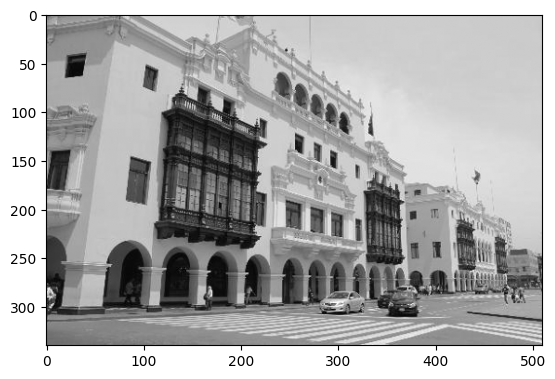

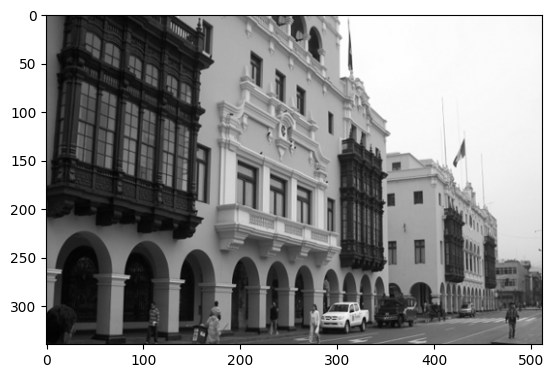

# kps: 1430, descriptors: (1430, 128)


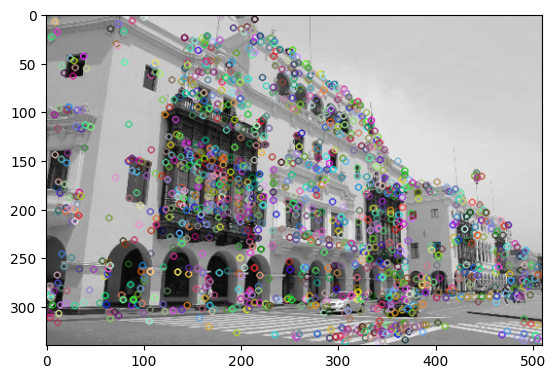

# kps: 1510, descriptors: (1510, 128)


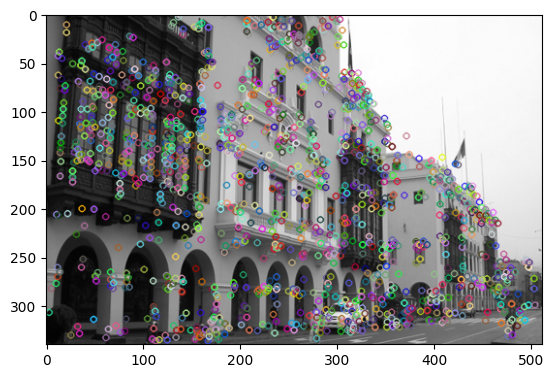

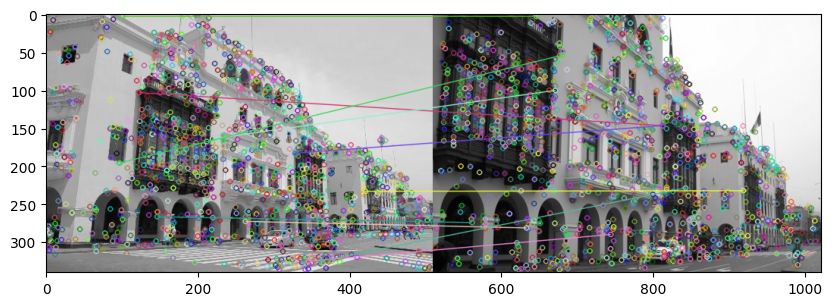

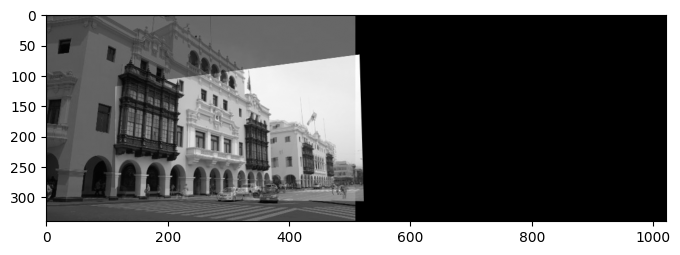

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1    = cv2.imread('Imagenes/lima1.png',0)
fig1    = plt.imshow(img1, cmap='gray')
plt.show()

img2    = cv2.imread('Imagenes/lima2.png',0)
fig2    = plt.imshow(img2, cmap='gray')
plt.show()

#Computando SIFT :: kp1=> lista de keypoints y desc => descriptor
sift1      = cv2.xfeatures2d.SIFT_create()
kp1, desc1 = sift1.detectAndCompute(img1,None)
print("# kps: {}, descriptors: {}".format(len(kp1), desc1.shape))
img4 = cv2.drawKeypoints(img1,kp1,img1)
fig4 = plt.imshow(img4, cmap='gray')
plt.show()
cv2.imwrite('sift_keypoints.jpg',img4)

kp2, desc2 = sift1.detectAndCompute(img2,None)
print("# kps: {}, descriptors: {}".format(len(kp2), desc2.shape))
img5 = cv2.drawKeypoints(img2,kp2,img2)
fig5 = plt.imshow(img5, cmap='gray')
plt.show()
cv2.imwrite('sift_keypoints2.jpg',img5)

#Matching Keypoints usando BLT:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img1)


plt.figure(figsize=(10,10))
plt.imshow(img3),plt.show()

points1 = np.zeros((len(matches),2), dtype = np.float32)
points2 = np.zeros((len(matches),2), dtype = np.float32)

for i , match in enumerate(matches):
    points1[i,:] = kp1[match.queryIdx].pt
    points2[i,:] = kp2[match.trainIdx].pt

#Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

imgRes = cv2.warpPerspective(img2, h, (img1.shape[1] + img2.shape[1], img2.shape[0]))
#Realizamos el image blending
imgRes[0:img1.shape[0],0:img1.shape[1]] = 0.5*imgRes[0:img1.shape[0],0:img1.shape[1]] + 0.5*img1

plt.figure(figsize=(8,4))
plt.imshow(imgRes, cmap='gray')
plt.show()
